<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Concevez-une-application-à-destination-de-la-santé:-une-application-pour-faciliter-la-perte-de-poids" data-toc-modified-id="Concevez-une-application-à-destination-de-la-santé:-une-application-pour-faciliter-la-perte-de-poids-1"><strong>Concevez une application à destination de la santé: une application pour faciliter la perte de poids</strong></a></span><ul class="toc-item"><li><span><a href="#0.-Imports,-paramètres-et-fonctions" data-toc-modified-id="0.-Imports,-paramètres-et-fonctions-1.1">0. Imports, paramètres et fonctions</a></span></li><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1.2">1. Introduction</a></span></li><li><span><a href="#2.-Analyses-univariées" data-toc-modified-id="2.-Analyses-univariées-1.3">2. Analyses univariées</a></span><ul class="toc-item"><li><span><a href="#2.1-Distributions-des-nutriments" data-toc-modified-id="2.1-Distributions-des-nutriments-1.3.1">2.1 Distributions des nutriments</a></span></li><li><span><a href="#2.2-Nutriments---Boite-à-moustaches" data-toc-modified-id="2.2-Nutriments---Boite-à-moustaches-1.3.2">2.2 Nutriments - Boite à moustaches</a></span></li><li><span><a href="#2.3-Distribution-du-score-nutritionnel-et-du-Nutri-score" data-toc-modified-id="2.3-Distribution-du-score-nutritionnel-et-du-Nutri-score-1.3.3">2.3 Distribution du score nutritionnel et du Nutri-score</a></span></li><li><span><a href="#2.4-Distribution-des-catégories" data-toc-modified-id="2.4-Distribution-des-catégories-1.3.4">2.4 Distribution des catégories</a></span></li><li><span><a href="#2.5-Distribution-des-nutriments-regroupés-par-Nutri-score" data-toc-modified-id="2.5-Distribution-des-nutriments-regroupés-par-Nutri-score-1.3.5">2.5 Distribution des nutriments regroupés par Nutri-score</a></span><ul class="toc-item"><li><span><a href="#A.-fibre_100g" data-toc-modified-id="A.-fibre_100g-1.3.5.1">A. fibre_100g</a></span></li><li><span><a href="#B.-energy_100g" data-toc-modified-id="B.-energy_100g-1.3.5.2">B. energy_100g</a></span></li><li><span><a href="#C.-proteins_100g" data-toc-modified-id="C.-proteins_100g-1.3.5.3">C. proteins_100g</a></span></li></ul></li></ul></li><li><span><a href="#2.-Analyses-bivariées" data-toc-modified-id="2.-Analyses-bivariées-1.4">2. Analyses bivariées</a></span><ul class="toc-item"><li><span><a href="#Score-nutritionnel-vs-nutriments" data-toc-modified-id="Score-nutritionnel-vs-nutriments-1.4.1">Score nutritionnel vs nutriments</a></span></li></ul></li><li><span><a href="#3.-Analyse-en-composante-principales" data-toc-modified-id="3.-Analyse-en-composante-principales-1.5">3. Analyse en composante principales</a></span></li><li><span><a href="#4.-Simulation-de-l'application" data-toc-modified-id="4.-Simulation-de-l'application-1.6">4. Simulation de l'application</a></span></li><li><span><a href="#5.Conclusions" data-toc-modified-id="5.Conclusions-1.7">5.Conclusions</a></span></li></ul></li></ul></div>

# **Concevez une application à destination de la santé: une application pour faciliter la perte de poids**

## 0. Imports, paramètres et fonctions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#paramètres matplotlib
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11

In [3]:
#fonction pour plotter le cercle de correlation, source: TP du cours sur l'exploration des données
def plot_correlations(x, y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  #0 for PC1
                 pca.components_[y, i],  #1 for PC2
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02,              )

        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 data_ACP.columns[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} {}%'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} {}%'.format(x+2, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title('Cercle des corrélations (F{} et F{})'.format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)
    
def simulation_application(data):
    """Cette fonction prend en entrée un dataframe, choisi une catégorie et un produit aléatoire et retourne un dataframe
    composé de produits avec une teneur en macronutriments similaire au produit choisi (+- 15%), un score nutritionnel égal ou supérieur et 
    avec un apport énergétique inférieur
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
   
    Return: dataframe des produits similaires moins calorique
    
    """
    #sélection aléatoire d'une catégorie
    category = np.random.choice(data['pnns_groups_1'].unique())
    #filtre sur la catégorie
    data_cat = data[(data['pnns_groups_1']== category)] 
    #sélection aléatorie d'un produit
    product = np.random.choice(data_cat.index)
    product = data_cat.loc[product]
    #affichage nom du produit et calories
    print(product['product_name'], product['energy_100g'])
    #sélection des produits similaires
    data_cat = data_cat[(data_cat['carbohydrates_100g'] >= product['carbohydrates_100g']*0.85) & (data_cat['carbohydrates_100g'] <= product['carbohydrates_100g']*1.15)]
    data_cat = data_cat[(data_cat['fat_100g'] >= product['fat_100g']*0.85) & (data_cat['fat_100g'] <= product['fat_100g']*1.15)]
    data_cat = data_cat[(data_cat['proteins_100g'] >= product['proteins_100g']*0.85) & (data_cat['proteins_100g'] <= product['proteins_100g']*1.15)]
    data_cat = data_cat[data_cat['nutrition-score-fr_100g'] <= product['nutrition-score-fr_100g']]
    data_cat = data_cat[data_cat['energy_100g'] < product['energy_100g']]
    return data_cat.sort_values('energy_100g')

## 1. Introduction

Ce projet consiste en la proposition d'une application à destination de la santé, en utilisant le jeu de données Open Food Facts. 

Mon idée d'application est la suivante : **l’utilisateur va utiliser l’application pour scanner un produit, et l'application va proposer des produits similaires, c’est à dire dans la même catégorie, avec des valeurs de  macronutriments similaires, avec le même Nutri-score ou un Nutri-score supérieur, mais avec moins de calories**
(Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E, établi en fonction de la valeur nutritionnelle d'un produit alimentaire).

Le nettoyage du jeu des données a déjà été réalisé dans le notebook "Nardi_Elena_1_notebook_nettoyage_112022", ce notebook est consacré à l'analyse des données.

In [4]:
#lecture données
data = pd.read_csv('Data/Cleaning/cleaned_data.csv')

## 2. Analyses univariées

Afin de mieux comprendre les données, je vais examiner leurs distributions.

### 2.1 Distributions des nutriments

In [5]:
#Variables liées aux nutriments
nutrients_columns = [
    'fat_100g',
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'fiber_100g',
    'proteins_100g', 
    'salt_100g',
    'vitamins_100g'
    ]

In [6]:
#statistiques de base
data[nutrients_columns].describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamins_100g
count,229513.000000,229513.000000,229513.000000,229513.000000,229513.000000,229513.000000,229513.000000,229513.000000
mean,10.860779,4.478834,28.414826,15.084208,1.872483,6.670601,0.907618,0.015691
std,16.030875,7.615807,28.132308,20.685207,2.959802,7.850222,1.208181,0.102671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.580000,1.000000,0.000000,0.600000,0.063500,0.000000
50%,3.600000,1.000000,15.380000,5.000000,0.800000,4.170000,0.543560,0.000000
75%,16.670000,6.250000,52.730000,21.430000,2.700000,9.470000,1.300000,0.000321
max,100.000000,100.000000,100.000000,100.000000,60.000000,92.000000,10.000000,1.957671


En examinant les statistiques de base j'ai pu noter que les maximas des variables sont beaucoup plus grands que le 0.75 quantile. Ainsi, afin de produire des visualisations plus lisible,s je vais prendre comme limite le 0.75 quantile (à la section suivante, les boites à moustache permettront de visualiser les valeurs aberrantes).


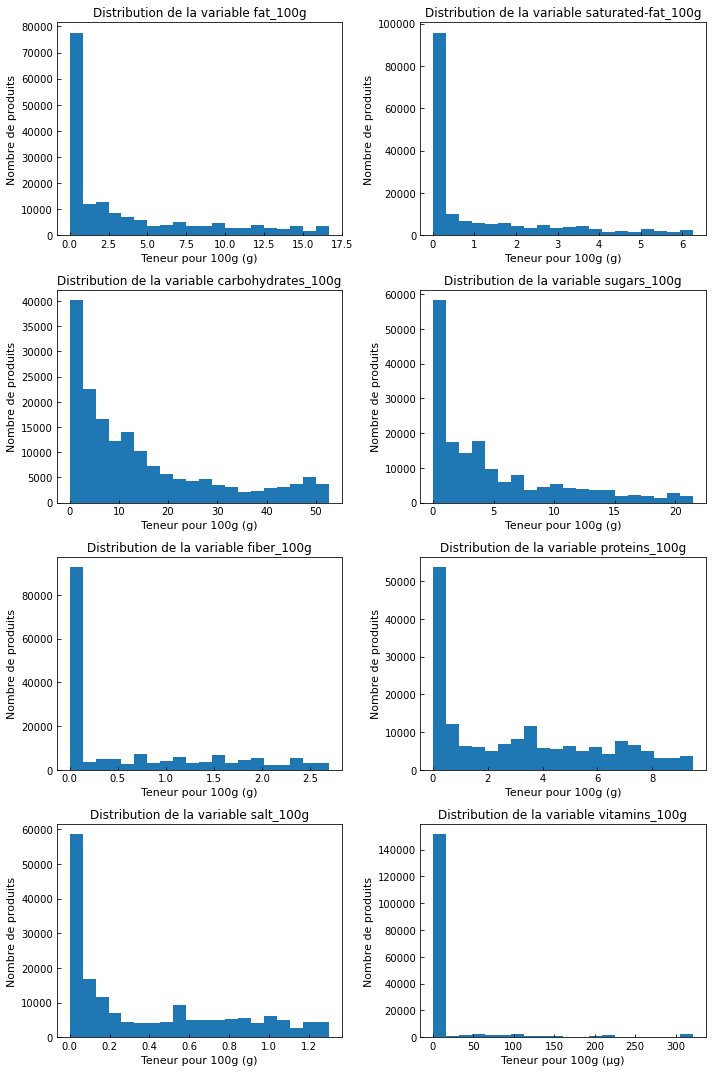

In [7]:
#Graphiques des distributions
fig, ax = plt.subplots(4, 2, figsize =(10, 15))

count = 1
for col in nutrients_columns:
    plt.subplot(4,2,count)
    plt.title('Distribution de la variable ' + col)
    plt.xlabel('Teneur pour 100g (g)')
    plt.ylabel('Nombre de produits')
    if col == 'vitamins_100g':
        plt.xlabel('Teneur pour 100g (\u03BCg)')
        vitamins_mg = round(data[col]*1000000)
        plt.hist(vitamins_mg, range = (0, vitamins_mg.quantile(0.75)), bins = 20)
    else:
        plt.hist(data[col], range = (0, data[col].quantile(0.75)), bins = 20)
    count+=1

fig.tight_layout()
plt.show()

On pourrait se poser la question s'il est normal d'avoir des distributions avec une grande densité des valeurs autour de zéro. 
En réfléchissant, beaucoup de produits de type pâtes, riz et céréales sont essentiellement composés de glucides et n'ont pas de sel. A l'inverse, des produits à base de viande ou fromage sont essentiellement composés de protéines et gras. Les fibres se trouvent surtout dans les fruits, légumes et céréales. 
Ainsi, il n'est pas étonnant de voir ces distribution.


### 2.2 Nutriments - Boite à moustaches

Une boite à moustache est intéressante pour examiner les possibles valeurs aberrantes et/ou atypiques.

Text(0, 0.5, 'Teneur pour 100g (g)')

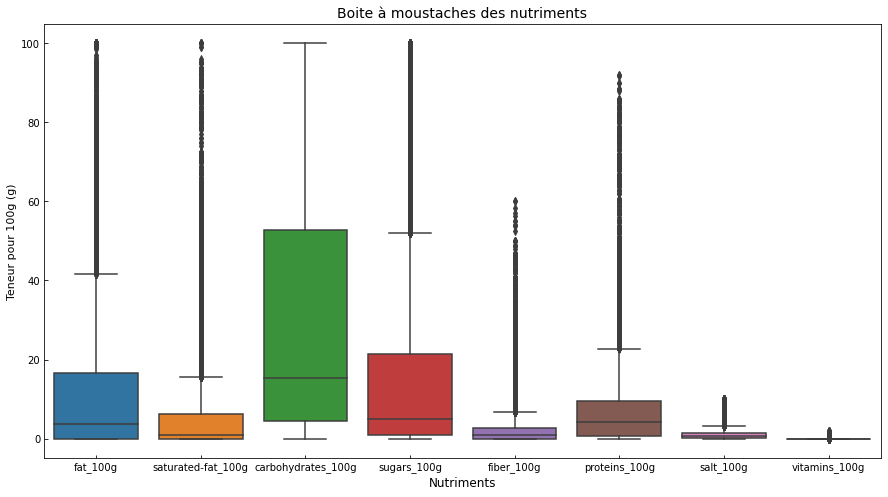

In [8]:
#boite à moustache
plt.figure(figsize=(15, 8))
sns.boxplot(data= data[nutrients_columns])
plt.title('Boite à moustaches des nutriments', fontsize = 14)
plt.xlabel('Nutriments', fontsize = 12)
plt.ylabel('Teneur pour 100g (g)')

Une boite à moustache considère comme 'outliers' les valeurs plus grands (ou plus petites) que 1,5 fois l'IQR (InterQuartile Range) du haut et du bas de la boîte. Ici, on peut noter une quantité remarquable des valeurs aberrantes. 

Lors de la phase de nettoyage, j'avais déjà supprimé des valeurs aberrantes. Afin de comprendre s'il s’agit de vrais valeur aberrantes ou tout simplement atypiques, je vais regarder, pour chaque nutriment, des exemples de données aberrantes avec les noms des produits associés.


In [11]:
for col in ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamins_100g']:
    print(col)
    data_col = data.loc[data[col] > ((data[col].quantile(0.75)- data[col].quantile(0.25))*1.5 + data[col].quantile(0.75)), :]["product_name"]
    print(data_col.sample(5).values, '\n')

fat_100g
['Beurre de baratte bio' 'Cerneaux de noix' 'Manteiga com Sal '
 'Hand Rolled Local Artisan Butter' 'Swad, Coconut Oil'] 

saturated-fat_100g
['Freefrom Fromage à pâte molle' 'Almonds in dark chocolate : vegan'
 'Manchego Shredded Cheese' 'Blanc noisettes entières' "Dés d'Emmental"] 

sugars_100g
['Blueberry Elderberry Preserves'
 'bonbons dragéifiés goût fruits assortis avec sucres et edulcorant'
 'Schokorosinen' 'Preserves, Blackberry' 'Dark Chocolate Peppermint Roca'] 

fiber_100g
['Grand Chocolat Noir 84%' 'Fjord' 'Organic Instant Oatmeal'
 'Instant Oatmeal, Maple & Brown Sugar' 'Wonder Merveilles Mix'] 

proteins_100g
['Jambon de Vendée' 'California Natural Sharp Cheddar Cheese'
 'Filet De Poulet Pommes De Terre A La Sarladaise'
 'New Bridge, Peppe Jack' 'Emmental Français râpé (29 % MG) '] 

salt_100g
['Sesame Flavored Dressing' 'Saucisse Artisanale' nan 'Sauce soja sucrée'
 'Saucisson Sec Pur Porc'] 

vitamins_100g
['Wave, Apple With White Cranberries Juice' 'Frozen Dai

 - Gras et gras saturés : parmi les produits aberrants, on peut trouver de l'huile, du beurre et des fromages

 - Sucres : parmi les produits aberrants on peut trouver du chocolat et des snacks sucrés

 - fibres : parmi les produits aberrants on peut trouver des produits à base d'avoine et de chocolat, qui sont riches en fibres

 - Protéines : parmi les produits aberrants on peut trouver du fromage et de la charcuterie
 
 - Sel : parmi les produits aberrants on peut trouver des sauces et des saucissons
 
 - Vitamines : parmi les produits aberrants on peut trouver des produits à base des fruits
 
En examinant les différents produits, je peux conclure qu'il pourrait y avoirs des valeurs vraiment aberrantes, mais il s'agit surtout des valeurs atypiques.
 

### 2.3 Distribution du score nutritionnel et du Nutri-score 

In [12]:
data = data.sort_values('nutrition_grade_fr')

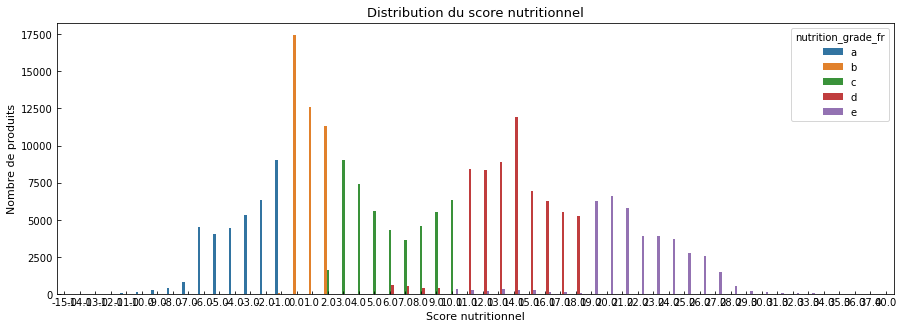

In [13]:
#distibution du score nutritionnel
plt.figure(figsize=(15,5))
sns.countplot(data = data, x = 'nutrition-score-fr_100g', hue = 'nutrition_grade_fr')
plt.title('Distribution du score nutritionnel', fontsize= 13)
plt.xlabel('Score nutritionnel', fontsize = 11)
plt.ylabel('Nombre de produits')
plt.legend(loc= 'upper right', title = 'nutrition_grade_fr')


Les produits les plus representés dans le jeu des données sont le produits avec un score nutritionnel de 0.

Text(0, 0.5, 'Nombre de produits')

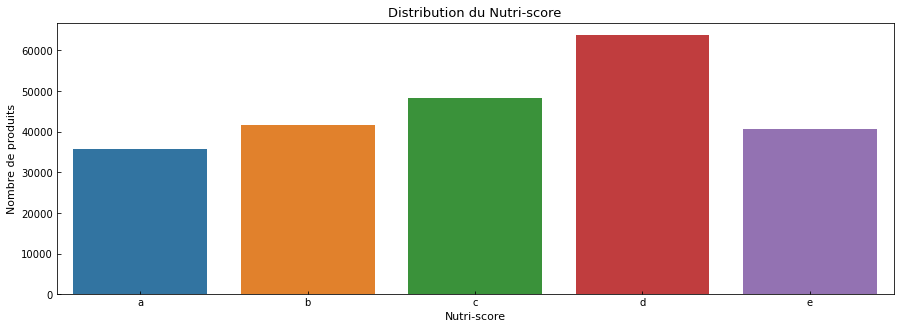

In [14]:
#Distribution du Nutri-score
plt.figure(figsize=(15,5))
sns.countplot(data = data, x = 'nutrition_grade_fr')
plt.title('Distribution du Nutri-score', fontsize= 13)
plt.xlabel('Nutri-score', fontsize = 11)
plt.ylabel('Nombre de produits')

Les produits les plus representés dans le jeu des données sont le produits avec un Nutri-score de D, les produits les moins representés ont un score A.

### 2.4 Distribution des catégories 

Text(0, 0.5, 'Nombre de produits')

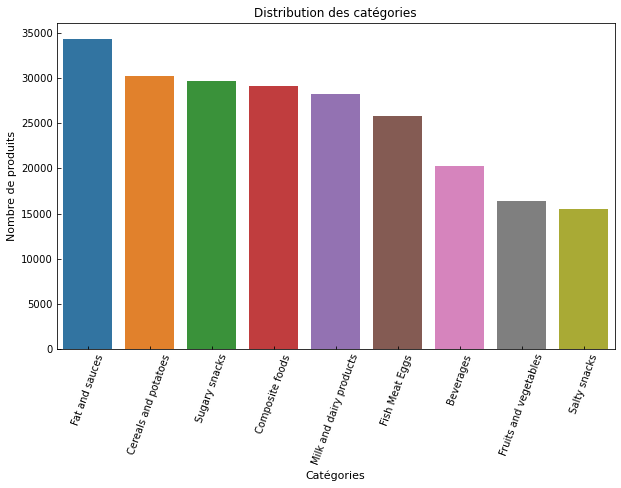

In [15]:
#Distribution des catégories
plt.figure(figsize = (10, 6))
plt.xticks(rotation = 70)
sns.countplot(data = data, x = 'pnns_groups_1', order = data['pnns_groups_1'].value_counts().index)
plt.title('Distribution des catégories')
plt.xlabel('Catégories')
plt.ylabel('Nombre de produits')

La catégorie la plus presente est 'Fat and Sauces', celle moins presente est 'Salty Snacks'

### 2.5 Distribution des nutriments regroupés par Nutri-score

L'idée ici est de vérifier la cohérence entre teneur en nutriments et Nutri-score.
Pour les variables qui rentrent dans le calcul du Nutri-score, je vais examiner les boites à moustaches en regroupant les produits par Nutri-score. Pour les nutriments avec une contribution négative au Nutri-score (acides gras saturés, apport énergétique, sel et sucres), les meilleurs scores devraient être concentrés à des petites teneurs et inversement pour les nutriments avec une contribution positive.

Pour faciliter la visualisation et la compréhension des tendances, les boites à moustaches ne vont pas afficher les valeurs aberrantes. 

NB: Pour le calcul du Nutri-score, l'apporte en termes de vitamines est pris en compte à travers la teneur en fruits-vegetables-nuts, variable qui avait trop de valeurs manquantes dans le jeu des données non nettoyé et a été donc supprimée. Je vais utiliser la variable `vitamines_100g` à la place. 
 

In [16]:
#variables liées au Nutri-score
nutriscore_columns = [
    'saturated-fat_100g', 
    'energy_100g',
    'sugars_100g', 
    'salt_100g',                  
    'fiber_100g',
    'proteins_100g', 
    'vitamins_100g']

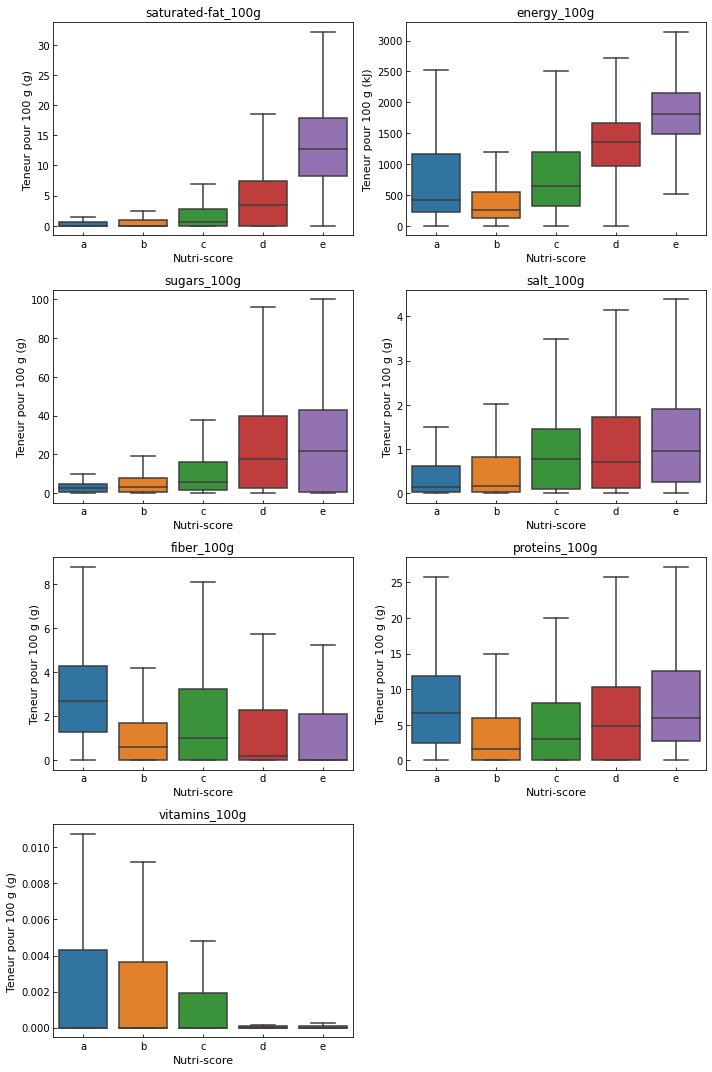

In [17]:
#Distributions
fig, ax = plt.subplots(4, 2, figsize =(10, 15))

count = 1
for col in nutriscore_columns:
    plt.subplot(4,2,count)
    plt.title(col)
    sns.boxplot(y = data[col],  x = data['nutrition_grade_fr'], showfliers = False)
    plt.xlabel('Nutri-score')
    if col == 'energy_100g':
        plt.ylabel('Teneur pour 100 g (kJ)')
    else:
        plt.ylabel('Teneur pour 100 g (g)')
    count+=1
fig.delaxes(ax[3][1])
fig.tight_layout()
plt.show()

Pour les acides gras saturés, sucres et sel, la tendance est celle attendue : plus la teneur est petite, meilleur est le score. Pour les vitamines plus la teneur est grande, meilleur est le score. La relation n'est pas exactement linéaire pour trois variables : `energy_100g`, `fibre_100g` et `proteins_100g`. 



#### A. fibre_100g

En ce qui concerne les fibres, les produits avec Nutri-score B ont moyennement des teneurs plus petites que les produits avec Nutri-score C. Il faut rappeler ici que cette variable avait, dans le jeu de données de départ non nettoyé, 22% des valeurs manquantes et les valeurs manquantes ont été remplacés à l’aide d’un KNN Imputer. Ces données sont probablement moins fiables par rapport aux autres données. L'important est que la tendance est globalement décroissante et que les produits avec Nutri-score A ont une teneur en fibres nettement supérieure aux produits avec des scores inférieurs.

#### B. energy_100g

En ce qui concerne la variable `energy_100g`, la tendance est croissante mais les produits avec un Nutri-score de A ont moyennement un apport énergétique supérieur aux produits avec un Nutri-score B. Je me suis posée la question si cette tendance pourrait être due à une différente répartition des catégories. Je vais ainsi examiner les catégories.

In [18]:
#données avec un Nutri-score A
data_a = data[data['nutrition_grade_fr']=='a']
#données avec un Nutri-score B
data_b = data[data['nutrition_grade_fr']=='b']


In [19]:
#pourcentage de répartition des catégories pour les produits avec Nutri-score A
data_a_count = data_a['pnns_groups_1'].value_counts()*100/data_a.shape[0]
#pourcentage de répartition des catégories pour les produits avec Nutri-score A
data_b_count = data_b['pnns_groups_1'].value_counts()*100/data_b.shape[0]

(0.0, 38.0)

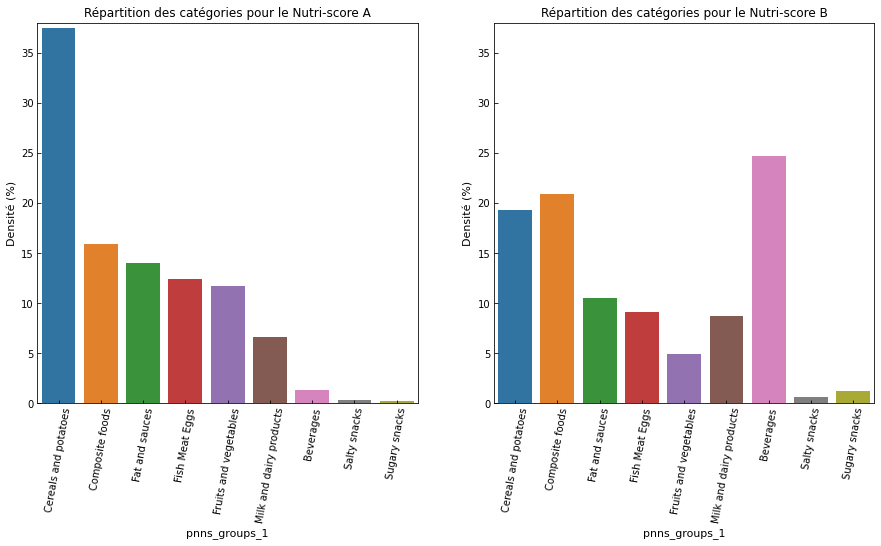

In [20]:
#plot des répartitions des catégories
fig, ax = plt.subplots(1, 2, figsize=(15,7))

plt.subplot(1,2,1)
sns.barplot(x = data_a_count.index, y = data_a_count.values)
plt.title('Répartition des catégories pour le Nutri-score A')
plt.xlabel('pnns_groups_1')
plt.ylabel('Densité (%)')
plt.xticks(rotation = '80')
plt.ylim((0,38))
plt.subplot(1,2,2)
sns.barplot(x = data_b_count.index, y = data_b_count.values, order = data_a_count.index)
plt.title('Répartition des catégories pour le Nutri-score B')
plt.xticks(rotation = '80')
plt.xlabel('pnns_groups_1')
plt.ylabel('Densité (%)')
plt.ylim((0,38))

En effet, pour le Nutri-score A, la catégorie 'Cereal and potatoes' est plus représentée par rapport au Nutri-score B (37% et 17%, respectivement). Aussi, pour le Nutri-score A, la catégorie 'Beverages' est moins représentée par rapport au Nutri-score B (2% et 17%, respectivement). Je vais examiner séparément l'apport énergétique des catégories 'Beverages' et 'Cereal et potatoes' et des autres catégories.

In [21]:
#données avec catégorie Beverages ou Cereal et potatoes
data_bcp = data[(data['pnns_groups_1'] == 'Beverages')| (data['pnns_groups_1'] == 'Cereal et potatoes')]

Text(0.5, 1.0, "Boite à moustache de l'apport énergétique \n des catégories Beverages et Cereals et Potatoes")

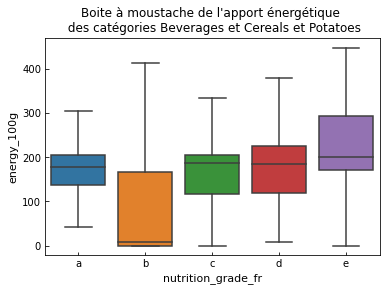

In [22]:
#boxplot de Beverages et Cereal et potatoes
sns.boxplot(y = data_bcp['energy_100g'],  x = data_bcp['nutrition_grade_fr'], showfliers = False)
plt.title('Boite à moustache de l\'apport énergétique \n des catégories Beverages et Cereals et Potatoes')

In [23]:
#autres catégories
data_others = data[(data['pnns_groups_1'] != 'Beverages')& (data['pnns_groups_1'] != 'Cereals and potatoes')]

Text(0.5, 1.0, "Boite à moustache de l'apport énergétique \n des autres catégories")

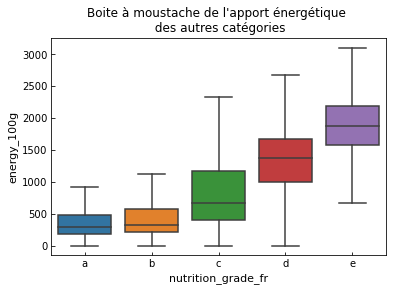

In [24]:
#boxplot des autres catégories
sns.boxplot(y = data_others['energy_100g'],  x = data_others['nutrition_grade_fr'], showfliers = False)
plt.title('Boite à moustache de l\'apport énergétique \n des autres catégories')

Effectivement, si on ne prend pas en compte les catégories 'Beverages' et 'Cereals and potatoes', la tendance est parfaitement croissante.

#### C. proteins_100g

En ce qui concerne les protéines, la tendance est croissante même si elles constituent un élément positif du Nutri-score, la tendance devrait donc être décroissante. 
Une raison pourrait être la source des protéines : par exemple, beaucoup des viandes contient aussi des gras, et de même pour les fromages. Ainsi, j'ai voulu examiner la tendance du ratio protéines/gras.


In [25]:
#création d'une nouvelle variables ratio proteines/gras
data['proteins/fat'] = data['proteins_100g']/data['fat_100g']

Text(0.5, 1.0, 'Boite à moustache du ratio proteines/gras en fonction du Nutri-score')

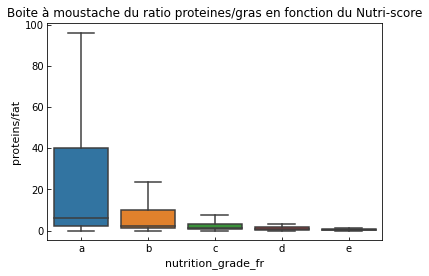

In [26]:
sns.boxplot(y = data['proteins/fat'],  x = data['nutrition_grade_fr'], showfliers = False)
plt.title('Boite à moustache du ratio proteines/gras en fonction du Nutri-score')

Ici on trouve la bonne tendance: plus le ratio est élevé plus il y a des protéines et meilleur est le score, ce qui valide l'hypothèse émise.

## 2. Analyses bivariées

### Score nutritionnel vs nutriments

Dans cette partie, je vais utiliser des nuages de points pour illustrer la relation entre score nutritionnel (valeurs numériques entre -15 et 40) et la teneur en nutriments. Avec la méthode regplot de seaborn, il est également possible de tracer le modèle de régression. Je vais utiliser cette méthode pour mieux visualiser la tendance.

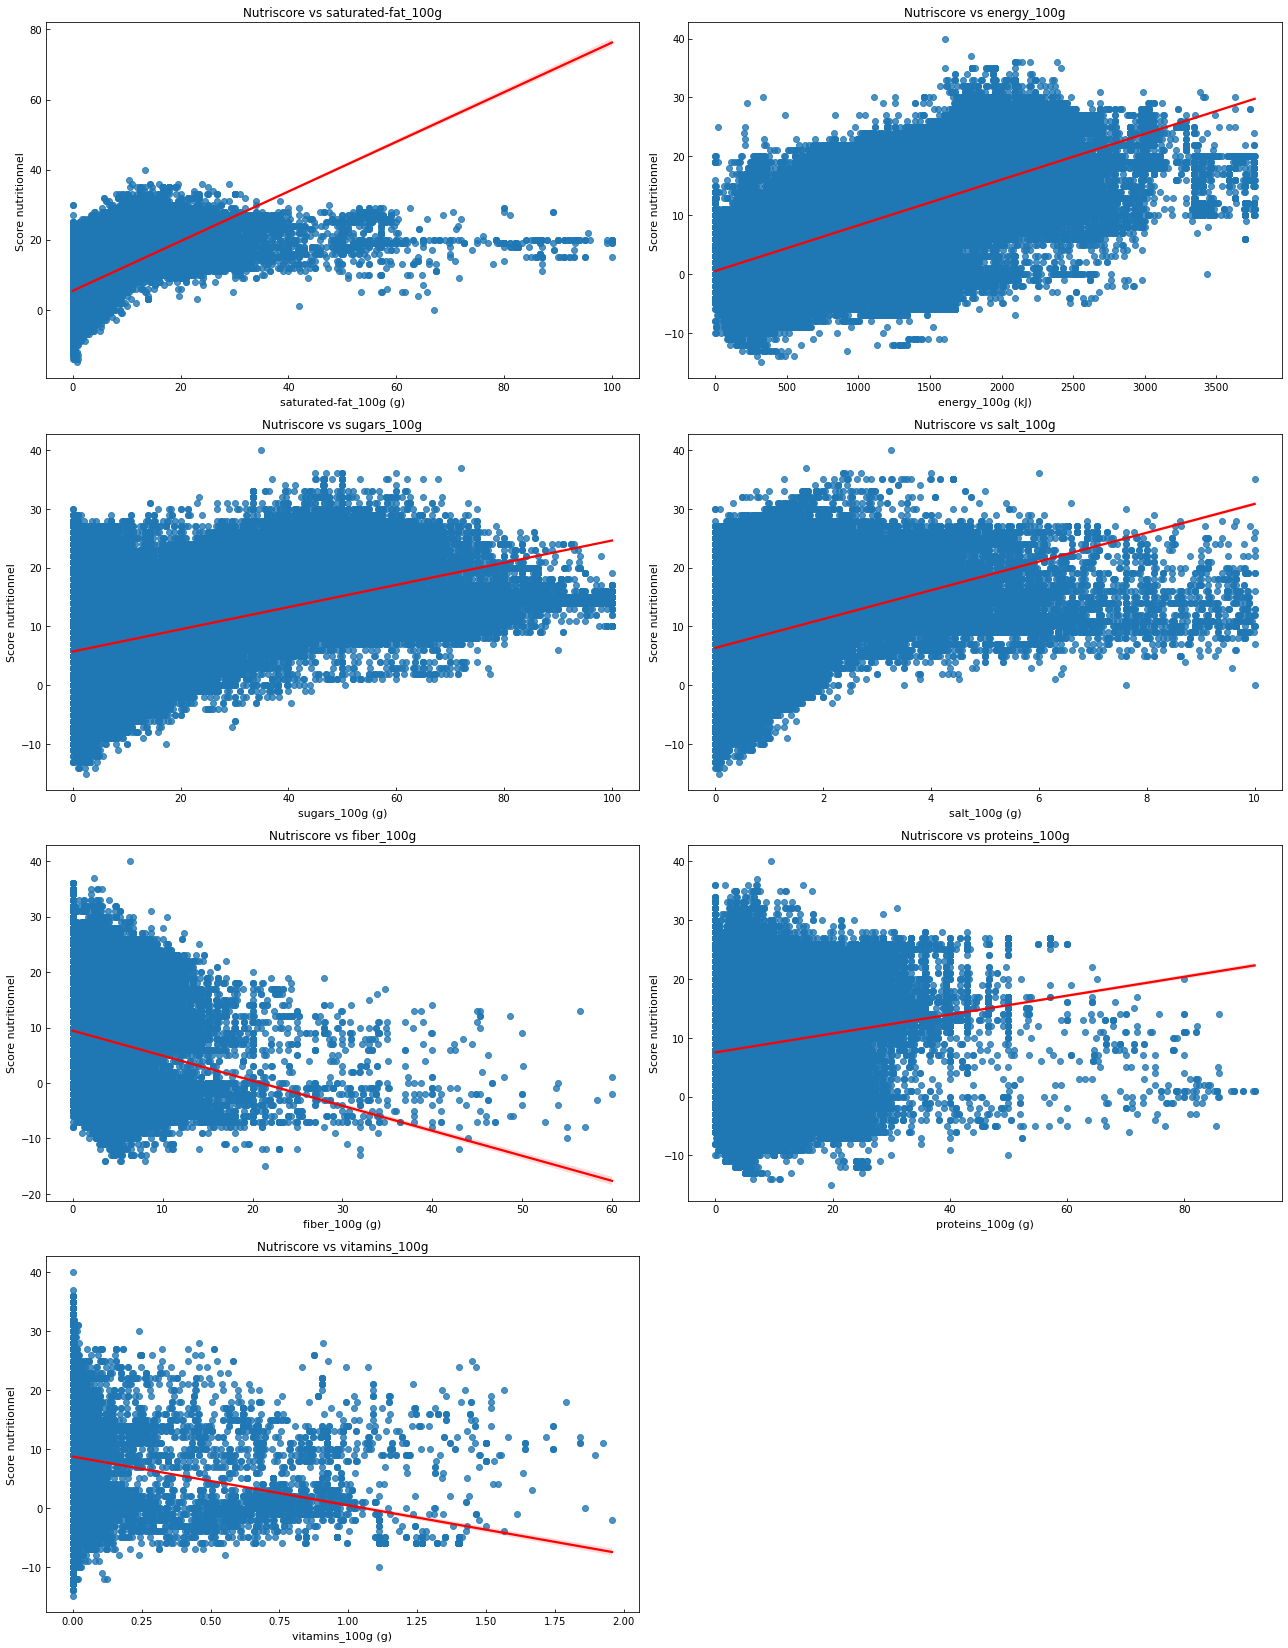

In [27]:
#regplots
fig, ax = plt.subplots(4, 2, figsize =(18, 23))

count = 1
for col in nutriscore_columns:
    plt.subplot(4,2,count)
    plt.title('Nutriscore vs ' + col)
    sns.regplot(data= data, x = col, y = 'nutrition-score-fr_100g', line_kws={'color': 'red'})
    if col == 'energy_100g':
        plt.xlabel(col + ' (kJ)')
    else:
        plt.xlabel(col + ' (g)')
    plt.ylabel('Score nutritionnel')
    count+=1
fig.delaxes(ax[3][1])
fig.tight_layout()
plt.show()

Les tendances semblent bien être cohérentes : pour les 'mauvaises' variables – apport énergétique, sucres, gras et sel – la tendance est positive : plus la teneur est élevée, plus le score sera élevé (e pire sera le Nutri-score). On peut observer le contraire pour les fibres et vitamines - nutriment positif- mais pas pour les protéines. Comme déjà observé lors des analyses univariées, les produits riches en protéines sont des produits qui peuvent être gras. Ainsi, je vais plutôt examiner le ratio protéines/gras.

Text(0.5, 1.0, 'Score nutritionnel vs proteins/fat')

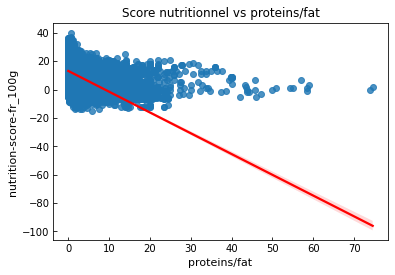

In [28]:
#regplot score nutritionnel vs ratio proteins/fat, limité aux données ou le fat > 1 pour ne pas avoir des valeurs trop grandes 
sns.regplot(data= data[data['fat_100g']>1], x = 'proteins/fat', y = 'nutrition-score-fr_100g', line_kws={'color': 'red'})
plt.title('Score nutritionnel vs ' + 'proteins/fat')

## 3. Analyse en composante principales

Afin de comprendre les corrélations entre les variables, je vais effectuer une analyse en composantes principales.

In [29]:
#selection variables pour l'ACP
ACP_columns = [
    'energy_100g', 
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g',
    'sugars_100g', 
    'fiber_100g', 
    'proteins_100g', 
    'salt_100g',
    'vitamins_100g']
data_ACP = data[ACP_columns]

In [30]:
#scaling des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_ACP)
#ACP
pca = PCA()
pca.fit(X_scaled)

PCA()

In [31]:
#pourcentage de variance expliquée
pca.explained_variance_ratio_

array([0.28433796, 0.23047518, 0.13767866, 0.10712479, 0.10156264,
       0.06901752, 0.03935031, 0.02440977, 0.00604318])

Text(0, 0.5, 'Pourcentage de variance expliqué')

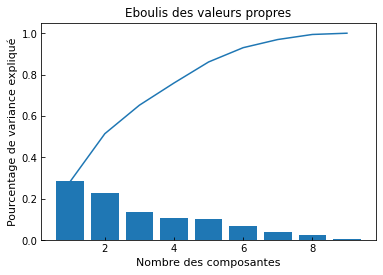

In [32]:
#Eboulis des valeurs propres
plt.bar(range(1,10), pca.explained_variance_ratio_)
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum())
plt.title('Eboulis des valeurs propres')
plt.xlabel('Nombre des composantes')
plt.ylabel('Pourcentage de variance expliqué')

Pour les deux premières composante principales, la variance totale expliquée est de 51%. Ceci veut que si on voulait réduire l'espace des variables à 2 dimensions, on perdrait beaucoup d'informations.

In [33]:
#dataframe des variables en fonction des composantes ACP
pd.DataFrame(pca.components_[:6].T, index = data_ACP.columns)

,0,1,2,3,4,5
energy_100g,0.586196,-0.134083,0.038044,0.004323,-0.035175,-0.012130
fat_100g,0.524697,0.210031,-0.231930,0.149075,0.080432,-0.197812
saturated-fat_100g,0.490493,0.185275,-0.273937,0.134536,0.035453,0.025811
carbohydrates_100g,0.195901,-0.589383,0.194747,-0.118587,-0.180195,0.021828
sugars_100g,0.150629,-0.579243,-0.119901,-0.160903,-0.245852,0.140232
fiber_100g,0.139402,-0.150969,0.536589,-0.104271,0.703278,-0.319737
proteins_100g,0.223673,0.312773,0.482026,-0.162802,-0.050222,0.750931
salt_100g,0.099267,0.308367,0.354609,-0.400945,-0.566911,-0.517224
vitamins_100g,-0.010034,-0.070558,0.413996,0.849454,-0.282157,-0.079161


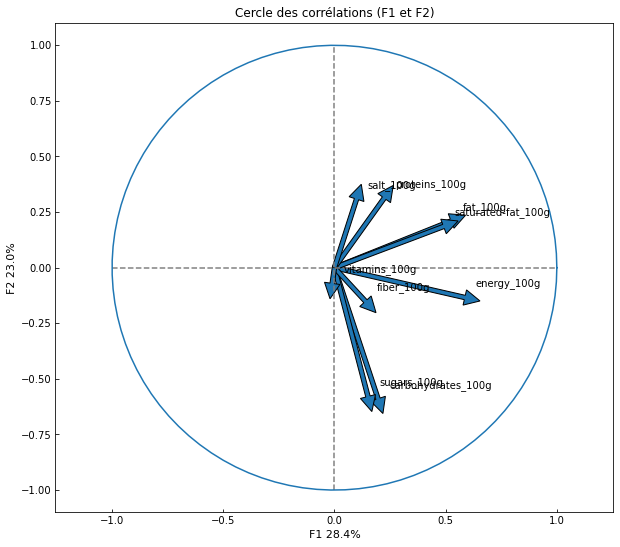

In [34]:
#Cercle des corrélations pour les 2 prémieres composantes principales
plot_correlations(0,1)

Le diagramme des corrélations pour les 2 premières composantes principales est difficilement interprétable. La première composante principale pourrait être liée à l'apport énergétique (sauf pour les vitamines, toutes les autres variables ont une contribution positive) ; pour la deuxième composante l'interprétation n'est pas du tout évidente.

Pour conclure, l'analyse en composante principales suggère une faible corrélation entre variables.

Pour le confirmer, je vais aussi examiner le corrélogramme (la carte couleurs de la matrice des corrélations).
 


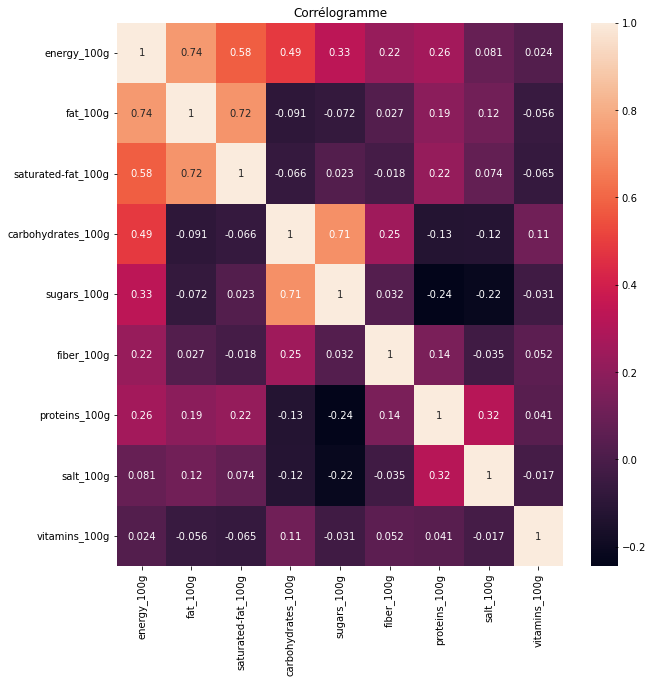

In [35]:
#Corrélogramme
plt.figure(figsize=(10, 10))
sns.heatmap(data_ACP.corr(), annot = True)
plt.title ('Corrélogramme')
plt.tick_params(direction = 'out')

L'apport énergétique est fortement corrélé au gras (ce qui est logique, étant donné que le gras est le macronutriment qui apporte le plus des calories), et les sucres sont très corrélés aux glucides (ce qui est logique, étant donné que les sucres font partie des glucide). Cependant, les autres variables montrent une faible corrélation. Ainsi, l'ACP ne fait que diagonaliser une matrice qui est déjà presque diagonale.

## 4. Simulation de l'application

La fonction `simulation_application` permet de simuler l'application en choisissant un produit aléatoire, et en cherchant des produits similaires en termes de macronutriments, score nutritionnel mais avec moins des calories.
La fonction permet de voir le nom et calories du produit choisi, ainsi que le dataframe des produits similaires moins calorique.


In [229]:
simulation_application(data)

Filets de Colin d'Alaska panés 891.0


,code,url,product_name,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,vitamins_100g
169598,3263859474416,http://world-fr.openfoodfacts.org/produit/3263...,Panés au merlan,a,Composite foods,803.0,8.60,1.00,16.70,1.90,2.000,10.90,0.80000,-2.0,0.000000
181237,3492500026241,http://world-fr.openfoodfacts.org/produit/3492...,Panés au Merlan,a,Composite foods,816.0,8.50,0.80,16.30,0.80,1.200,12.70,0.66000,-2.0,0.000000
166666,3257982267601,http://world-fr.openfoodfacts.org/produit/3257...,2 panés au merlan,a,Composite foods,817.0,8.50,0.80,16.30,0.80,1.200,12.70,0.66000,-2.0,0.000000
102986,688267138942,http://world-fr.openfoodfacts.org/produit/0688...,Battered Cod Fillets,a,Composite foods,820.0,9.82,0.89,16.07,0.89,0.000,12.50,0.58928,-1.0,0.002100
171115,3270160199341,http://world-fr.openfoodfacts.org/produit/3270...,Filets de Merlan,a,Composite foods,820.0,8.80,1.00,15.30,2.70,1.100,13.30,0.56000,-2.0,0.000000
184896,3564700000489,http://world-fr.openfoodfacts.org/produit/3564...,Bâtonnets de colin d'Alaska (100% filet),b,Composite foods,821.0,8.60,1.10,17.30,1.70,1.000,11.80,0.89916,0.0,0.000000
160944,3250390025474,http://world-fr.openfoodfacts.org/produit/3250...,Cabillaud Pané,b,Composite foods,826.0,8.50,1.10,18.40,1.30,0.680,11.70,0.63000,0.0,0.000000
171104,3270160193301,http://world-fr.openfoodfacts.org/produit/3270...,4 filets de cabillaud panure croustillante,a,Composite foods,835.0,8.50,0.90,17.80,0.80,1.000,12.30,0.63500,-2.0,0.000000
225084,8428159100174,http://world-fr.openfoodfacts.org/produit/8428...,Hamburguesa vegetal de tofu con algas,b,Composite foods,839.0,9.10,1.80,17.60,0.90,2.600,10.80,1.30000,0.0,0.000000
181240,3492500033850,http://world-fr.openfoodfacts.org/produit/3492...,Panés au Colin d'Alaska,a,Composite foods,840.0,8.80,0.70,18.50,0.80,0.800,11.40,0.62000,-2.0,0.000000


Ici, par exemple le produit choisi sont des filets de Colin d'Alaska panés. Les produits suggérés sont des produits à base de poisson moins caloriques.

## 5.Conclusions

J'ai réalisé :
 - des analyses univariées, pour étudier les distributions des variables et le profil des distributions des informations nutritionnelles selon le Nutri-score. Ceci a permis de voir que les valeurs considérées comme aberrantes sont plutôt des valeurs atypiques et que les distributions ont les profils attendus
 - des analyse bivariées pour étudier la relation entre score nutritionnel et informations nutritionnelles; ceci a permis de voir que la relation est celle attendue: tendance croissante pour les éléments qui contribuent négativement au score et décroissante pour les éléments positifs
 - une analyse multivariée à l'aide de l'analyse en composantes principales, qui a permis de conclure que les informations nutritionnelles sont peu corrélées. 
 
La fonction qui simule l'application en choisissant un produit aléatoire et en trouvant des produits similaires moins caloriques a donné de bons résultats. 

Le jeu des données est ainsi fiable, et je peux l'utiliser pour développer le prototype de l'application.


